In [ ]:
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Dataframe manipulation library
import pandas as pd
#Graph plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Loading in the movies dataset
products_df = pd.read_csv('/content/productsT.csv', sep=',', header=None, engine='python')
products_df.head()

,0,1,2
0,1,Illumina Color ORC-12,Concealer
1,2,Eljuda Emulsion Pro,Concealer
2,3,link Keratin shampoo 500ml,Oil
3,4,Geo wax solid hold,Oil
4,5,Patagonic Oil Iseberg Moist 100,Concealer


In [ ]:
#Loading in the ratings dataset
ratings_df = pd.read_csv('/content/ratingsT.csv', sep=',', header=None, engine='python')
ratings_df.head()

,0,1,2
0,4,17,4.9
1,21,15,2.1
2,16,2,0.3
3,29,6,0.3
4,17,15,1.6


In [ ]:
products_df.columns = ['ProductID', 'Title', 'Tags']
products_df.head()

,ProductID,Title,Tags
0,1,Illumina Color ORC-12,Concealer
1,2,Eljuda Emulsion Pro,Concealer
2,3,link Keratin shampoo 500ml,Oil
3,4,Geo wax solid hold,Oil
4,5,Patagonic Oil Iseberg Moist 100,Concealer


In [ ]:
ratings_df.columns = ['UserID', 'ProductID', 'Rating']
ratings_df.head()

,UserID,ProductID,Rating
0,4,17,4.9
1,21,15,2.1
2,16,2,0.3
3,29,6,0.3
4,17,15,1.6


In [ ]:
len(products_df)

32

In [ ]:
user_rating_df = ratings_df.pivot_table(index='UserID', columns='ProductID', values='Rating')
user_rating_df.head()

ProductID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,2.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,NaN,0.3,NaN,3.033333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.65,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.80,NaN,NaN,NaN,NaN,NaN
3,NaN,2.70,NaN,NaN,3.8,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,3.9,NaN,NaN,2.7,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,1.1,NaN,0.4,3.9,NaN,NaN,NaN,NaN,4.9,3.600000,NaN,NaN,3.6,NaN,NaN,0.2,NaN,NaN,0.70,NaN,NaN,NaN,NaN,NaN
5,NaN,2.35,NaN,NaN,NaN,NaN,NaN,1.1,NaN,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,NaN,1.7,NaN,NaN,3.6,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[0.        , 0.56      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.32      , 0.        ,
        0.06      , 0.        , 0.60666667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.53      , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.1       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36      , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.54      , 0.        , 0.        , 0.76      ,
        0.        , 0.        , 0.        , 0.    

In [ ]:
hiddenUnits = 20
visibleUnits =  len(user_rating_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [ ]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [ ]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (32,)
v1 state shape:   (32,)


In [ ]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.5


Epoch: 1 batch #: 0  of 3 sample #: 9 reconstruction error: 0.232563
Epoch: 1 batch #: 1  of 3 sample #: 9 reconstruction error: 0.215000
Epoch: 1 batch #: 2  of 3 sample #: 9 reconstruction error: 0.252391
Epoch: 2 batch #: 0  of 3 sample #: 9 reconstruction error: 0.107563
Epoch: 2 batch #: 1  of 3 sample #: 9 reconstruction error: 0.200000
Epoch: 2 batch #: 2  of 3 sample #: 9 reconstruction error: 0.154891
Epoch: 3 batch #: 0  of 3 sample #: 9 reconstruction error: 0.013813
Epoch: 3 batch #: 1  of 3 sample #: 9 reconstruction error: 0.092500
Epoch: 3 batch #: 2  of 3 sample #: 9 reconstruction error: 0.293641
Epoch: 4 batch #: 0  of 3 sample #: 9 reconstruction error: 0.076312
Epoch: 4 batch #: 1  of 3 sample #: 9 reconstruction error: 0.058750
Epoch: 4 batch #: 2  of 3 sample #: 9 reconstruction error: 0.348641
Epoch: 5 batch #: 0  of 3 sample #: 9 reconstruction error: 0.076312
Epoch: 5 batch #: 1  of 3 sample #: 9 reconstruction error: 0.058750
Epoch: 5 batch #: 2  of 3 sample #

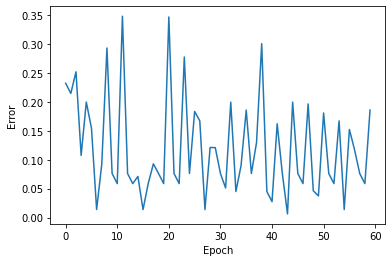

In [ ]:
epochs = 20
batchsize = 10
errors = []
weights = []
K=1
alpha = 0.1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)



#for i in range(epochs):
#    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
#        batch = trX[start:end]
#        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
#        prv_w = cur_w
#        prv_vb = cur_vb
#        prv_hb = cur_hb
#    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
#    print (errors[-1])
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:

        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 

                v0_state = v1_state

            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1




plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

Lets first select a <b>User ID</b> of our mock user:

In [ ]:
mock_user_id = 5

In [ ]:
trX

array([[0.        , 0.56      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.32      , 0.        ,
        0.06      , 0.        , 0.60666667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.53      , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.1       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36      , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.54      , 0.        , 0.        , 0.76      ,
        0.        , 0.        , 0.        , 0.    

In [ ]:
W

<tf.Tensor: shape=(32, 20), dtype=float32, numpy=
array([[ 0.16200012, -0.448     , -0.29599994, -0.7580001 , -0.516     ,
        -0.19799997, -0.16399994, -0.48200002, -0.40200004, -0.09999991,
         0.12400004, -0.41599998, -0.22799999, -0.18599996, -0.20599994,
        -0.10599988, -0.51400006, -0.36599997, -0.46999997, -1.3320004 ],
       [ 0.4800002 ,  0.02800011, -0.586     , -0.9920003 , -0.3880001 ,
        -0.305     , -0.22299978, -0.73300016, -1.1260002 ,  0.28000024,
        -0.8810004 , -0.6130001 , -0.20800012,  0.531     ,  0.95100033,
        -0.1429998 , -1.0570003 , -0.1739999 , -0.3650001 , -1.3070006 ],
       [ 0.0220001 ,  0.12900001,  0.03200004,  0.06700003, -0.549     ,
        -0.35800004, -0.16600011, -0.11200009, -0.5570003 , -0.15799998,
        -0.30099994, -0.11099996, -0.57600003, -0.06000009, -0.57500005,
        -0.0739999 , -0.53800005, -0.24800007, -0.39299995, -0.305     ],
       [-0.46999988, -0.32599998, -0.7120001 , -0.474     , -0.2619999 

In [ ]:
hb

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([ 2.3999999 , -0.6999999 ,  0.9000001 , -0.9       , -1.1       ,
       -2.0000002 ,  1.5000001 , -0.5999999 , -0.39999998,  3.0999992 ,
       -0.49999997, -2.2       , -0.59999996,  0.70000005, -1.1       ,
        1.7000002 , -0.29999998, -1.2       , -1.1       ,  0.6       ],
      dtype=float32)>

In [ ]:
vb

<tf.Tensor: shape=(32,), dtype=float32, numpy=
array([-1.0295837, -1.0295837, -1.0295837, -1.0295837, -1.0295837,
       -1.0295837, -1.0295837, -1.0295837, -1.0295837, -1.0295837,
       -1.0295837, -1.0295837, -1.0295837, -1.0295837, -1.0295837,
       -1.0295837, -1.0295837, -1.0295837, -1.0295837, -1.0295837,
       -1.0295837, -1.0295837, -1.0295837, -1.0295837, -1.0295837,
       -1.0295837, -1.0295837, -1.0295837, -1.0295837, -1.0295837,
       -1.0295837, -1.0295837], dtype=float32)>

In [ ]:
#Selecting the input user

inputUser = trX[mock_user_id-1].reshape(1, -1)
inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser

In [ ]:
#Feeding in the user and reconstructing the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
rec = vv1
tf.maximum(rec,1)

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]],
      dtype=float32)>

In [ ]:
scored_products_df_mock = products_df[products_df['ProductID'].isin(user_rating_df.columns)]
scored_products_df_mock = scored_products_df_mock.assign(RecommendationScore = rec[0])
scored_products_df_mock.sort_values(["RecommendationScore"], ascending=False).head(5)

,ProductID,Title,Tags,RecommendationScore
17,18,Lotus Herbals Divine Dew Herbal Sindoor,Cream,0.349326
1,2,Eljuda Emulsion Pro,Concealer,0.249243
14,15,Blue Heaven Studio Perfection Primer,Concealer,0.221304
25,26,Faces Canada Weightless Stay Matte Compact Vit...,Cream,0.164648
19,20,Navratna Emami,Oil,0.134842


In [ ]:
np.savetxt("W.csv", W, delimiter=",")
np.savetxt("hb.csv", hb, delimiter=",")
np.savetxt("vb.csv", vb, delimiter=",")


In [ ]:
trX

array([[0.        , 0.56      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.32      , 0.        ,
        0.06      , 0.        , 0.60666667, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.53      , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.1       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.36      , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.54      , 0.        , 0.        , 0.76      ,
        0.        , 0.        , 0.        , 0.    

In [ ]:
import pandas as pd

df = pd.DataFrame(trX)
df.to_csv('trX.csv',index=False)